## THE SPARKS FOUNDATION #GRIPMAR24

### Author: MANJUSHA PARAGE, DATA SCIENCE & BUSINESS ANALYTICS INTERN

## TASK-2 Prediction using Unsupervised ML

Predict the optimum number of clusters and represent it visually.

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset Sample: https://bit.ly/3kXTdox

# Import libraries : 

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Gathering 

In [5]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape # to check rows and column

(150, 6)

# Data Analysis (EDA) : 

# to check first 5 rows :

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# to check last 5 rows :

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# to check information 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# To check null values :

In [7]:
df.isnull().sum() # i can see that there is no null value 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Id column won't help us in Clustering 

In [8]:
df.drop('Id', axis = 1 , inplace = True)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Checking unique classes in dataset :

In [13]:
df.Species.nunique()

3

In [14]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
df.Species.value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

# Data Visualization Library : To visualize the data 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 

# To checking outliers : 

<Axes: xlabel='SepalLengthCm'>

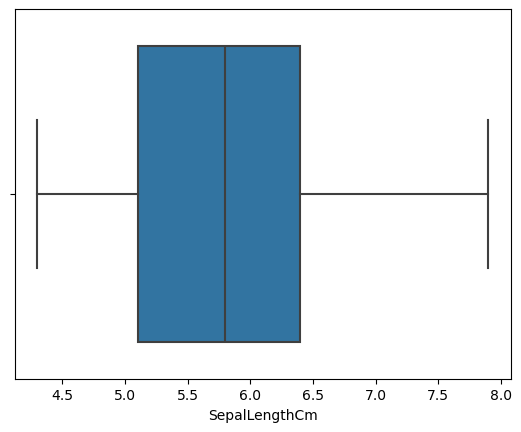

In [17]:
sns.boxplot(x = df['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm'>

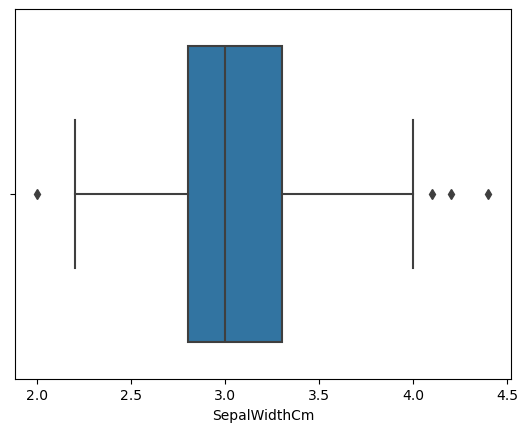

In [18]:
sns.boxplot(x = df['SepalWidthCm']) 

In [19]:
# As I can see that outliers is present on the 'SepalWidthCm' 

<Axes: xlabel='PetalLengthCm'>

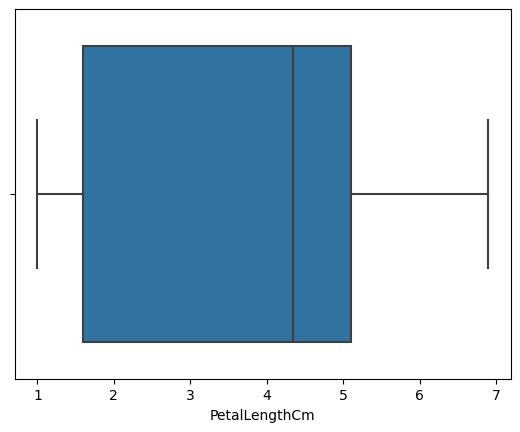

In [20]:
sns.boxplot(x = df['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm'>

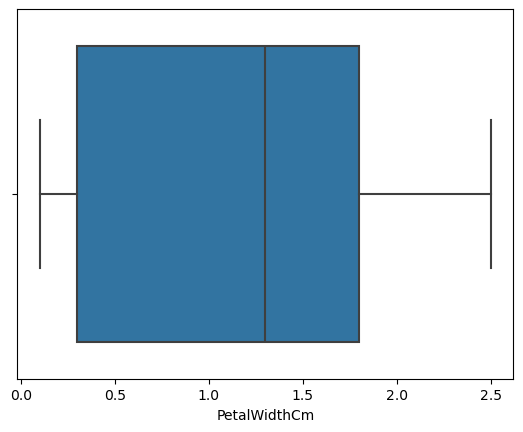

In [21]:
sns.boxplot(x = df['PetalWidthCm'])

# TO handle outliers :

In [ ]:
# But firstly i will check z_score method : 

In [22]:
df['SepalWidthCm']
mean = np.mean(df['SepalWidthCm'])
std = np.std(df['SepalWidthCm'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 3.0540000000000003
std. deviation is 0.4321465800705435


In [23]:
threshold = 3
outlier = []
for i in df['SepalWidthCm']:
	z = (i-mean)/std
	if z > threshold:
		outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [4.4]


# OR

## z_score :

In [24]:
def get_outliers(df):
    outliers_list = []
    mean = df['SepalWidthCm'].mean()
    print('Mean :',mean)
    std = df['SepalWidthCm'].std()
    print('STD :',std)
    for x in df['SepalWidthCm'].values:
        z_score = (x - mean)/std
        
        if np.abs(z_score) > 3:
            print(f" x == {x} and zscore == {z_score}")
            outliers_list.append(x)
    return outliers_list
get_outliers(df)

Mean : 3.0540000000000003
STD : 0.4335943113621737
 x == 4.4 and zscore == 3.104284269254884


[4.4]

## IQR :

IQR = Q3 - Q1

Q1 >> 25%
Q2 >> 50%
Q3 >> 75%

<Axes: >

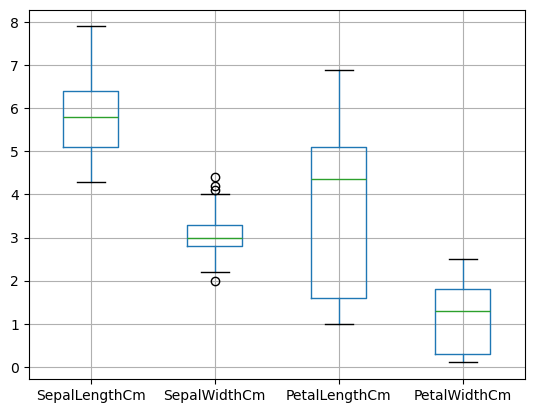

In [25]:
df.boxplot()

In [26]:
def remove_out_iqr(df):
    min1=df['SepalWidthCm'].min()
    max1=df['SepalWidthCm'].max()
    q1=df['SepalWidthCm'].quantile(0.25)
    q2=df['SepalWidthCm'].quantile(0.50)
    q3=df['SepalWidthCm'].quantile(0.75)
    iqr=q3-q1
    lower_tail= q1-(1.5*iqr)
    print('lower_tail',lower_tail)
    upper_tail= q3+(1.5*iqr)
    print('upper_tail',upper_tail)
    df['SepalWidthCm'] = np.where(df['SepalWidthCm'] > upper_tail , upper_tail,np.where(df['SepalWidthCm'] < lower_tail ,lower_tail,df['SepalWidthCm']))
    return df['SepalWidthCm']

In [27]:
remove_out_iqr(df)

lower_tail 2.05
upper_tail 4.05


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

<Axes: xlabel='SepalWidthCm'>

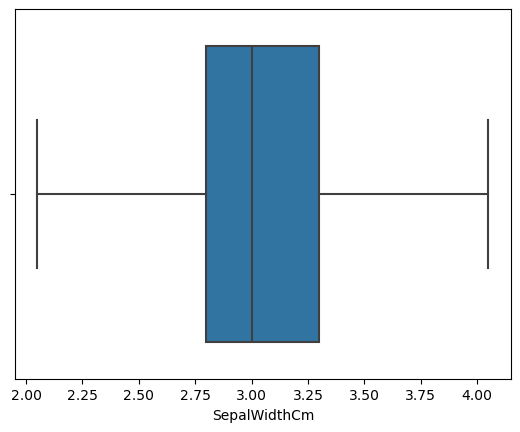

In [28]:
sns.boxplot(x = df['SepalWidthCm'])

## Drop the "species" column

### The reason for dropping the "species" column when applying K-Means clustering to the Iris dataset is because K-Means is an unsupervised learning algorithm, which means it does not use any target labels during the clustering process.

In [29]:
df.drop("Species" , axis = 1, inplace  = True)

In [30]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

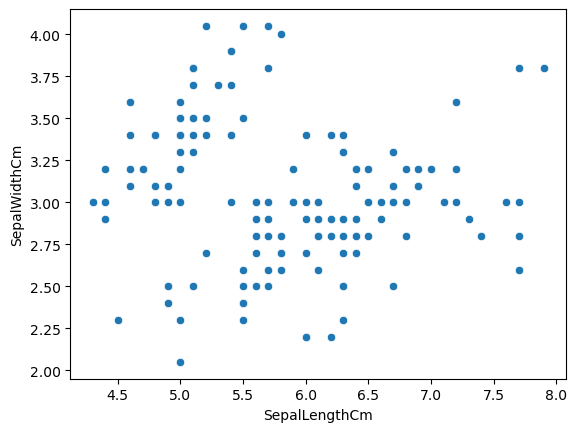

In [31]:
sns.scatterplot(data = df , x = "SepalLengthCm", y = "SepalWidthCm")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

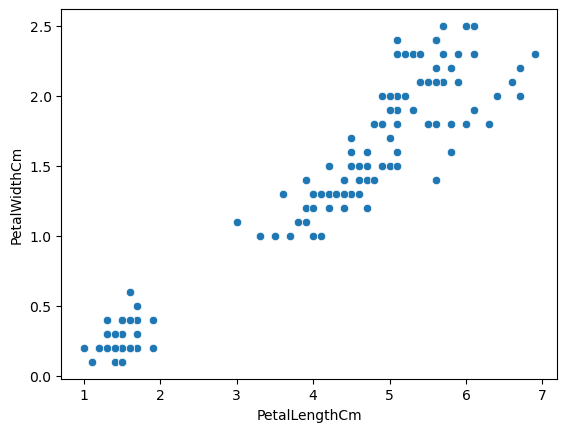

In [32]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm"]]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Model Training :

### K-Means is an unsupervised machine learning algorithm that is used for clustering problems. Since it is an unsupervised machine learning algorithm, it uses unlabelled data to make predictions.

In [13]:
from sklearn.cluster import KMeans

In [14]:
Kmeans_model = KMeans(n_clusters = 3)
Kmeans_model.fit(x)

KMeans(n_clusters=3)

In [15]:
y_var = Kmeans_model.fit_predict(x)
y_var

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
centroids = Kmeans_model.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

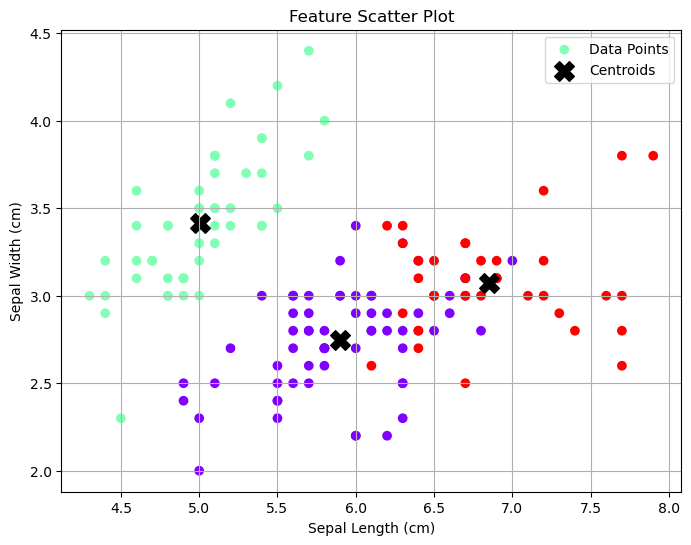

In [27]:
# Plot all features against each other
plt.figure(figsize=(8,6))

plt.scatter(x=df["SepalLengthCm"], y = df["SepalWidthCm"], c=y_var, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Feature Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

## WCSS 

## Within Clusters Sum Of Square :

In [32]:
wcss = Kmeans_model.inertia_
wcss

78.94084142614601

In [34]:
Kmeans_model = KMeans(n_clusters = 1)
Kmeans_model.fit(x)
Kmeans_model.inertia_

680.8244

In [35]:
Kmeans_model = KMeans(n_clusters = 2)
Kmeans_model.fit(x)
Kmeans_model.inertia_

152.36870647733906

In [36]:
Kmeans_model = KMeans(n_clusters = 3)
Kmeans_model.fit(x)
Kmeans_model.inertia_

78.94084142614601

In [37]:
Kmeans_model = KMeans(n_clusters = 4)
Kmeans_model.fit(x)
Kmeans_model.inertia_

57.31787321428571

In [38]:
Kmeans_model = KMeans(n_clusters = 5)
Kmeans_model.fit(x)
Kmeans_model.inertia_

46.535582051282056

In [39]:
Kmeans_model = KMeans(n_clusters = 6)
Kmeans_model.fit(x)
Kmeans_model.inertia_

38.95701115711986

In [40]:
Kmeans_model = KMeans(n_clusters = 7)
Kmeans_model.fit(x)
Kmeans_model.inertia_

34.421947665056365

In [41]:
Kmeans_model = KMeans(n_clusters = 8)
Kmeans_model.fit(x)
Kmeans_model.inertia_

30.202270053475942

In [42]:
Kmeans_model = KMeans(n_clusters = 9)
Kmeans_model.fit(x)
Kmeans_model.inertia_

28.30798416289593

In [43]:
Kmeans_model = KMeans(n_clusters = 10)
Kmeans_model.fit(x)
Kmeans_model.inertia_

26.47704560877931

In [44]:
Kmeans_model = KMeans(n_clusters = 11)
Kmeans_model.fit(x)
Kmeans_model.inertia_

25.236555723664424

In [45]:
Kmeans_model = KMeans(n_clusters = 12)
Kmeans_model.fit(x)
Kmeans_model.inertia_

23.028290792540794

In [46]:
Kmeans_model.cluster_centers_

array([[5.625     , 2.54166667, 3.86666667, 1.15833333],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [6.55714286, 2.95714286, 5.40714286, 2.03571429],
       [6.01666667, 2.70555556, 4.98333333, 1.77222222],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [7.8       , 3.8       , 6.55      , 2.1       ],
       [7.475     , 2.9125    , 6.3125    , 1.975     ],
       [5.64615385, 2.84615385, 4.3       , 1.37692308],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.46666667, 2.98333333, 4.6       , 1.42777778],
       [6.67272727, 3.25454545, 5.76363636, 2.32727273],
       [5.10909091, 3.50909091, 1.53181818, 0.28181818]])

In [47]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Elbow Method :

In [48]:
wcss_list = []
k_val = range(1,11)
for i in k_val:
    Kmeans_model = KMeans(n_clusters=i)
    Kmeans_model.fit(x)
    wcss = Kmeans_model.inertia_
    wcss_list.append(wcss)

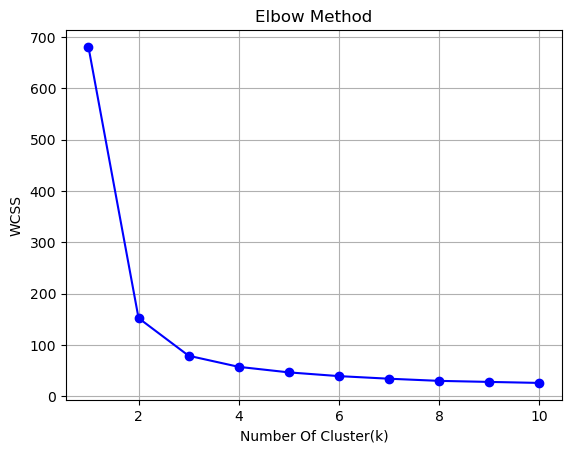

In [51]:
plt.plot(k_val,wcss_list, marker='o', linestyle='-', color='b')
plt.xlabel("Number Of Cluster(k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

Here, we can see that 3 clusters will be good to go for the cluster analysis as the elbow of the curve is tending at 3 which shows us that 3 clusters to use.

### Conclusion: K-means clustering is used in unsupervised learning to learn about the data and find the similarities and the dissimilarities in the observations and group them accordingly using centroids as the core to place them in certain cluster.